In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.loadtxt('../source/brain_animals.dat', delimiter = ",", dtype = float, skiprows = 1, usecols = [2])
y = np.loadtxt('../source/brain_animals.dat', delimiter = ",", dtype = float, skiprows = 1, usecols = [3])
names = np.loadtxt('../source/brain_animals.dat', delimiter = ",", dtype = str, skiprows = 1, usecols = [1])
print(len(x))
print(names)

64
[' Lesser Short-tailed Shrew' '          Little Brown Bat'
 '                     Mouse' '             Big Brown Bat'
 '                Musk Shrew' '           Star Nosed Mole'
 '     Eastern American Mole' '           Ground Squirrel'
 '                Tree Shrew' '            Golden Hamster'
 '                 Mole Rate' '                    Galago'
 '                       Rat' '                Chinchilla'
 '           Desert Hedgehog' '            Rock Hyrax (a)'
 '         European Hedgehog' '                    Tenrec'
 '    Arctic Ground Squirrel' ' African Giant Pouched Rat'
 '                Guinea Pig' '           Mountain Beaver'
 '                Slow Loris' '                     Genet'
 '                 Phalanger' '    North American Opossum'
 '                Tree Hyrax' '                    Rabbit'
 '                   Echidna' '                       Cat'
 '                 Artic Fox' '     Nine-banded Armadillo'
 '             Water Opossum' '            Rock Hyrax

In [3]:
for i, name in enumerate(names):
    names[i] = name.strip()
print(names)

['Lesser Short-tailed Shrew' 'Little Brown Bat' 'Mouse' 'Big Brown Bat'
 'Musk Shrew' 'Star Nosed Mole' 'Eastern American Mole' 'Ground Squirrel'
 'Tree Shrew' 'Golden Hamster' 'Mole Rate' 'Galago' 'Rat' 'Chinchilla'
 'Desert Hedgehog' 'Rock Hyrax (a)' 'European Hedgehog' 'Tenrec'
 'Arctic Ground Squirrel' 'African Giant Pouched Rat' 'Guinea Pig'
 'Mountain Beaver' 'Slow Loris' 'Genet' 'Phalanger'
 'North American Opossum' 'Tree Hyrax' 'Rabbit' 'Echidna' 'Cat' 'Artic Fox'
 'Nine-banded Armadillo' 'Water Opossum' 'Rock Hyrax (b)' 'Red Fox'
 'Raccoon' 'Roe Deer' 'Goat' 'Kangaroo' 'Gray Wolf' 'Sheep'
 'Giant Armadillo' 'Gray Seal' 'Jaguar' 'Brazilian Tapir' 'Donkey' 'Pig'
 'Protoceratops' 'Okapi' 'Camptosaurus' 'Cow' 'Horse' 'Giraffe'
 'Stegosaurus' 'Allosaurus' 'Asian Elephant' 'Anatosaurus' 'Iguanodon'
 'African Elephant' 'Tyrannosaurus' 'Triceratops' 'Diplodocus' 'Blue Whale'
 'Brachiosaurus']


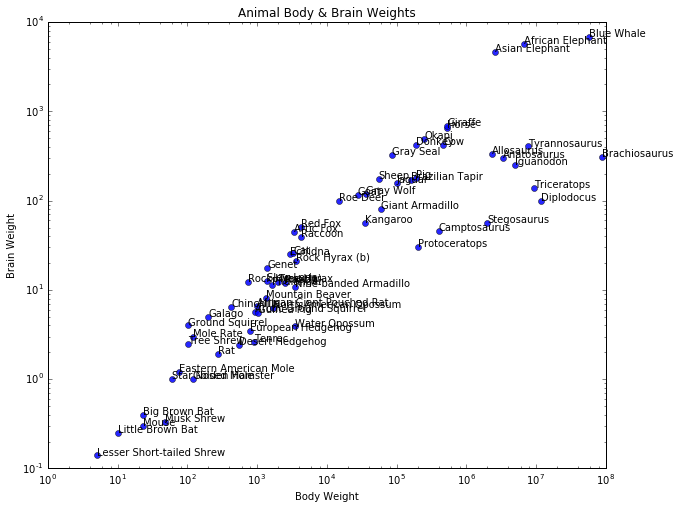

In [4]:
plt.figure(figsize = (10, 8))
plt.loglog(x, y, 'o', alpha = 0.85)
for i, name in enumerate(names):
    plt.text(x[i], y[i], name)
plt.title('Animal Body & Brain Weights')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')

In [5]:
classis = np.ones(shape = (len(x),))
for i, name in enumerate(names):
    if name in ('Protoceratops', 'Camptosaurus', 'Stegosaurus', 'Triceratops', 'Brachiosaurus', 
            'Diplodocus', 'Iguanodon', 'Anatosaurus', 'Allosaurus', 'Tyrannosaurus'):
        classis[i] = 0   

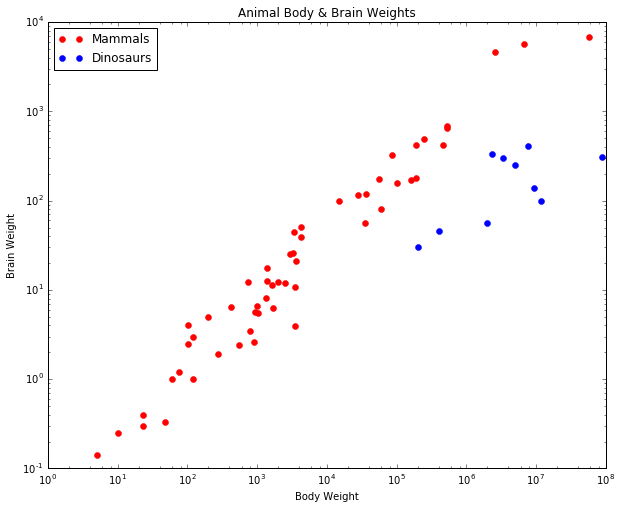

In [6]:
plt.figure(figsize = (10, 8))
plt.loglog(x[classis == 1], y[classis == 1], 'ro', markeredgecolor = 'r', label = 'Mammals')
plt.loglog(x[classis == 0], y[classis == 0], 'bo', markeredgecolor = 'b', label = 'Dinosaurs')
plt.title('Animal Body & Brain Weights')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.legend(loc = 2)

In [7]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
x = x.reshape((len(x), 1))
lr_model.fit(np.log10(x), np.log10(y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
beta_0 = lr_model.intercept_
beta_1 = lr_model.coef_[0]
print(beta_0, beta_1)

-0.805408805425 0.549888718542


$$
\lg {\rm brain} \approx \beta_0 + \beta_1\lg {\rm body}
\qquad
\Leftrightarrow
\qquad
{\rm brain} \approx 10^{\beta_0}\cdot{\rm body}^{\beta_1}
$$

In [9]:
lr_model.fit(np.log10(x[classis == 1]), np.log10(y[classis == 1]))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
beta_mam_0 = lr_model.intercept_
beta_mam_1 = lr_model.coef_[0]
print(beta_mam_0, beta_mam_1)

-1.27863541121 0.715931404654


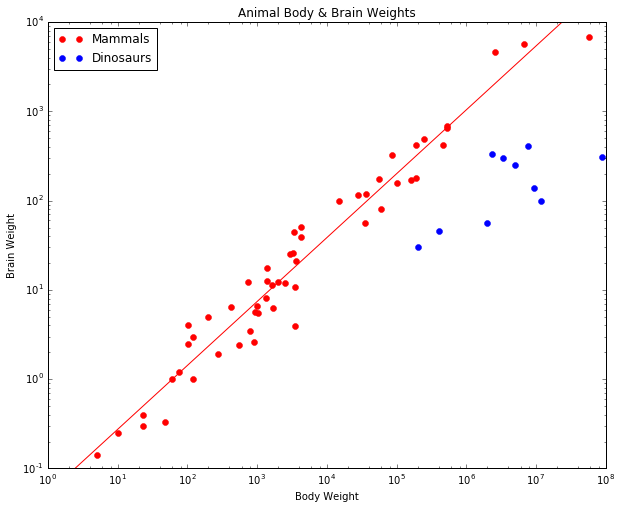

In [11]:
plt.figure(figsize = (10, 8))
plt.loglog(x[classis == 1], y[classis == 1], 'ro', markeredgecolor = 'r', label = 'Mammals')
plt.loglog(x[classis == 0], y[classis == 0], 'bo', markeredgecolor = 'b', label = 'Dinosaurs')

x0, x1 = plt.xlim()
y0, y1 = plt.ylim()
plt.plot([x0, x1], 10.0**lr_model.predict(np.log10([[x0], [x1]])), 'r')
plt.xlim((x0, x1))
plt.ylim((y0, y1))

plt.title('Animal Body & Brain Weights')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.legend(loc = 2)